<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Признаки:

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

Целевой признак:

- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [301]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as st
sns.set(style='darkgrid', font_scale=1.4)

In [302]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [303]:
try:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
except:
    geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
    
try:
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
except:
    geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
    
try:
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
except:
    geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')    

In [304]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [305]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [306]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [307]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [308]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [309]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [310]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [311]:
for i in [geo_data_0,geo_data_1,geo_data_2]:
    print(i.duplicated().sum())

0
0
0


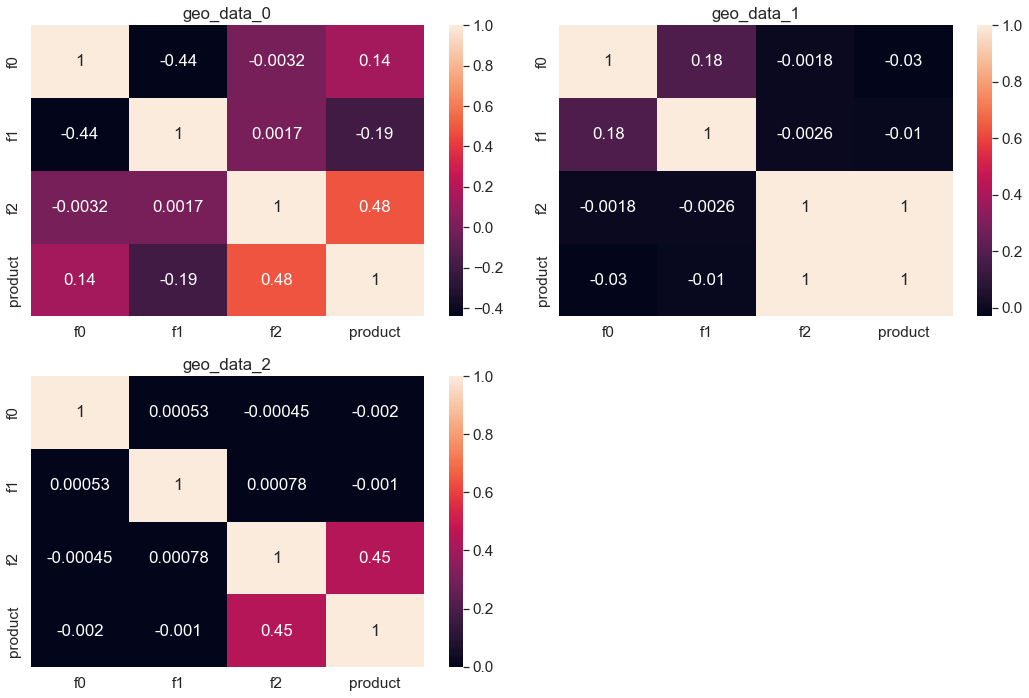

In [312]:
fig=plt.figure(figsize=(15,10))
j = 1
for i in [geo_data_0,geo_data_1,geo_data_2]:
    ax=fig.add_subplot(2,2,j)
    j+=1
    correlation_mat = i.corr()
    sns.heatmap(correlation_mat, annot = True, ax=ax)
    ax.set_title('geo_data_'+str(j-2))
    
fig.tight_layout()
plt.show()

Средняя положительная связь у признака f2 и product, в нулевом и втором регионе. Средняя отрицательная связь у признаков f1 и f0 в нулевом регионе. А между признаком f2 и product в регионе №1 коэффицент корреляции равен 1.

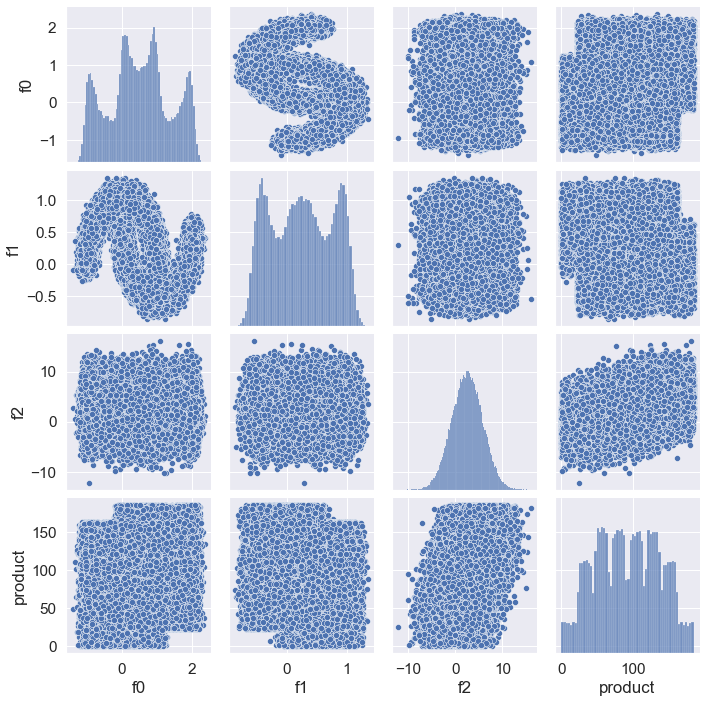

In [313]:
sns.pairplot(data=geo_data_0)

По диаграмме видна интересная нелинейная связь между f1 и f0.

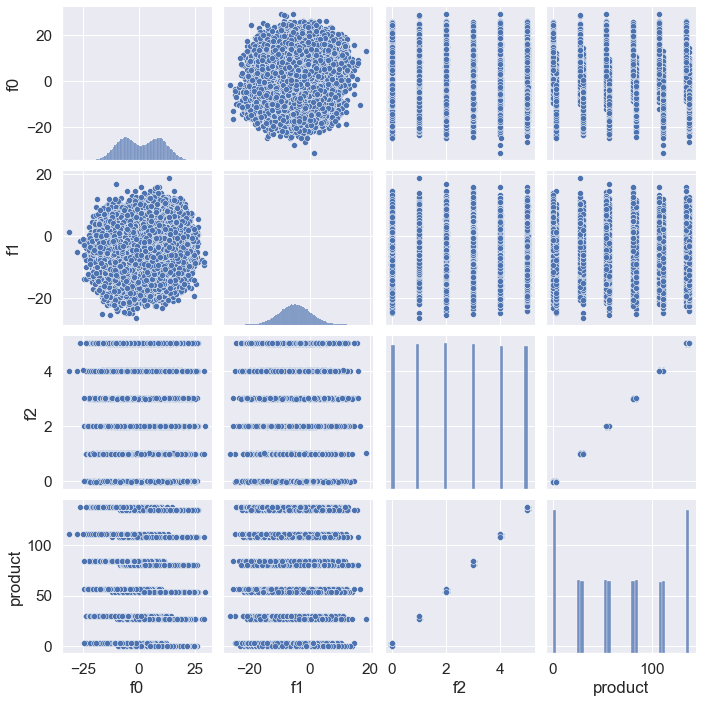

In [314]:
sns.pairplot(data=geo_data_1)

На диаграмме так сильная связь между product и f2. Так же по распределению видно, что данные синтетические. 

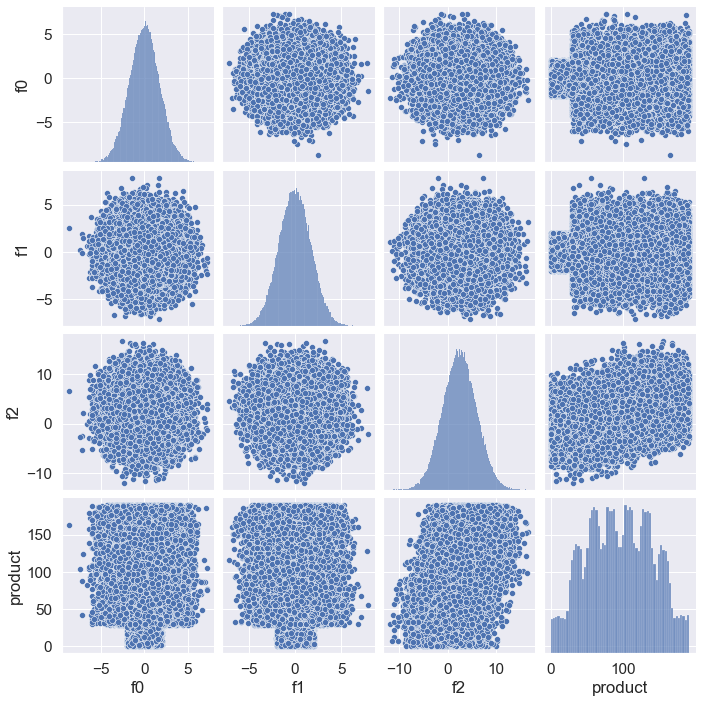

In [315]:
sns.pairplot(data=geo_data_2)

Здесь все признаки распределены нормально.

**Вывод**
- Пропусков, дубликатов и сильных выбросов в данных нет.
- Во датафрейме geo_data_1 cовершенная положительная линейная корреляция между признаком f2 и целевым product. С точки зрения бизнеса думаю очень неплохо, когда признаки сильно коррелируют с целевым, однако при построеннии линейной регресии вес при таком признаке будет значительно больше

## Обучение и проверка модели

In [316]:
def ml_pipeline(data):
    X = data.drop(['product', 'id'], axis=1)
    y = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25,
                                                                random_state = 42)
    y_valid = y_valid.reset_index(drop=True)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    predictions = pd.Series(predictions)
    rmse = mean_squared_error(predictions, y_valid, squared=False)
    average_product = sum(predictions) / len(predictions)
    averge_real_product = sum(y_valid) / len(y_valid)
    print('RMSE:', rmse, 'Cредний запас предсказанного сырья:', average_product, 'Реальный средний запас сырья:',
          averge_real_product)
    return (predictions, y_valid)

In [317]:
pred_0, y_valid_0 = ml_pipeline(geo_data_0)
pred_1, y_valid_1 = ml_pipeline(geo_data_1)
pred_2, y_valid_2 = ml_pipeline(geo_data_2)

RMSE: 37.756600350261685 Cредний запас предсказанного сырья: 92.3987999065781 Реальный средний запас сырья: 92.32595637084344
RMSE: 0.8902801001028838 Cредний запас предсказанного сырья: 68.71287803913759 Реальный средний запас сырья: 68.72538074724207
RMSE: 40.145872311342174 Cредний запас предсказанного сырья: 94.77102387765993 Реальный средний запас сырья: 95.15099907172


- Ошибка в регионе под номером 1 наименьшая
- Среднее количество сырья в регионах №0 и №2 почти в полтора раза больше, чем в 1

## Подготовка к расчёту прибыли

In [318]:
research_points = 500 
best_points = 200 
budget = 1e10
price = 450*10e2
state = np.random.RandomState(42)

In [319]:
budget_per_point = budget / best_points
break_even_point = round(budget_per_point / price, 2)
print('Точка безубыточности:', break_even_point, 'тыс. баррелей')

Точка безубыточности: 111.11 тыс. баррелей


In [381]:
def profit(pred, target):
    best_research_points = pred.sort_values(ascending = False)[:best_points]
    target_sort = target[best_research_points.index.drop_duplicates()][:best_points]
    product_volume = target_sort.sum() 
    profit = price * product_volume - budget


    # КОД РЕВЬЮЕРА, debug
    if sorted(best_research_points.index) != sorted(target_sort.index):
        print("Index Error!")
    if target_sort.shape[0] > best_research_points.shape[0]:
        print("Shape Mismatch! Targets shape:", target.shape)


    return round(profit, 2)
    

In [369]:
# КОД РЕВЬЮЕРА
_preds = pd.Series([1, 2, 2, 5, 5], index=[0, 1, 3, 3, 3,])
_target = pd.Series([1, 2, 2, 5, 5], index=[0, 1, 2, 3, 4])

_target.loc[_preds.index]

0    1
1    2
3    5
3    5
3    5
dtype: int64

In [370]:
print('Прибыль:',profit(pred_0, y_valid_0))
print('Прибыль:',profit(pred_1, y_valid_1))
print('Прибыль:',profit(pred_2, y_valid_2))

Прибыль: 3359141114.46
Прибыль: 2415086696.68
Прибыль: 2598571759.37


- Минимальный объем сырья для безубыточной разработки новой скважины - 111.11 тыс. бареллей. Во всех 3-х регионах среднее реальное количество сырья меньше.
- При выборе 200 лучших точек, наибольшую прибыль показывает регион N0.

## Расчёт прибыли и рисков 

In [414]:
def bootstrap(pred, target):
    values = []
    for i in range(1000):
        target_sample = target.sample(research_points, replace=True, random_state=state)
        pred_sort = pred[target_sample.index]
        values.append(profit(pred_sort, target_sample))
    values = pd.Series(values)     
    lower = round(values.quantile(0.025), 2)
    upper = round(values.quantile(0.975), 2)
    mean = round(values.mean(), 2)
    risk = round(st.percentileofscore(values, 0), 2)
    plt.figure(figsize=(8,5))
    sns.histplot(values, kde=True, color='dodgerblue')
    plt.title("Распределение выборочных прибылей", y=1.015, fontsize=20)
    plt.ylabel("Частота", labelpad=14)
    plt.xlabel("Средняя прибыль", labelpad=14)
    plt.axvline(x=lower, linestyle='--', linewidth=2.5, label="lower", c='deeppink')
    plt.axvline(x=upper, linestyle='--', linewidth=2.5, label="upper", c='deeppink')
    print('Доверительный интервал:', (lower, upper), 'Средняя прибыль:', mean, 'Вероятность убытков:', risk)
    #return ((lower, upper),  mean, risk)

Регион № 0:
Доверительный интервал: (-123940341.77, 879657197.01) Средняя прибыль: 399557057.51 Вероятность убытков: 6.6


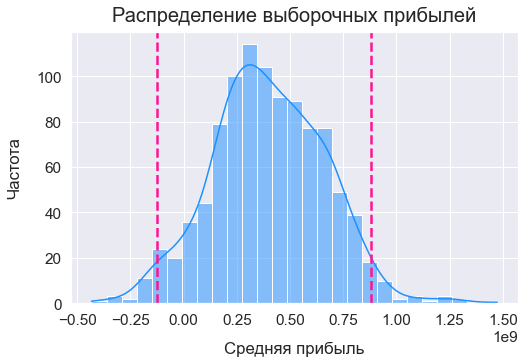

In [415]:
print('Регион № 0:')
bootstrap(pred_0, y_valid_0)

Регион № 1:
Доверительный интервал: (49538407.24, 856652772.16) Средняя прибыль: 448218376.38 Вероятность убытков: 1.7


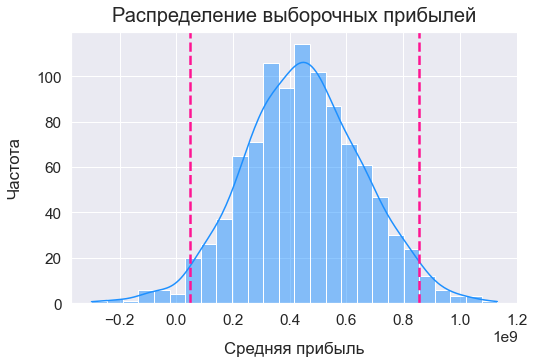

In [416]:
print('Регион № 1:')
bootstrap(pred_1, y_valid_1)

Регион № 2:
Доверительный интервал: (-105942218.05, 904595868.04) Средняя прибыль: 392191075.52 Вероятность убытков: 5.6


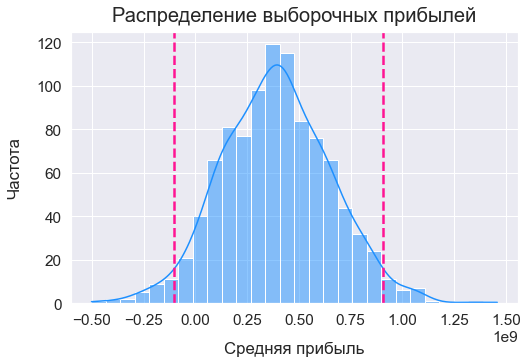

In [417]:
print('Регион № 2:')
bootstrap(pred_2, y_valid_2)

## Вывод

Для разработки скважин следует выбрать регион №1:
- Единственный регион, где вероятность убытков ниже, чем допустимое значение (2,5%)
- Самая высокая средняя прибыль
- Наиболее узкий дипазон значений доверительного интервала